In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_csv(r"C:\Users\kanik\Downloads\archive\Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Evaluation Metrics:
Mean Absolute Error (MAE): 970,043.40
Mean Squared Error (MSE): 1,754,318,687,330.66
R² Score: 0.653


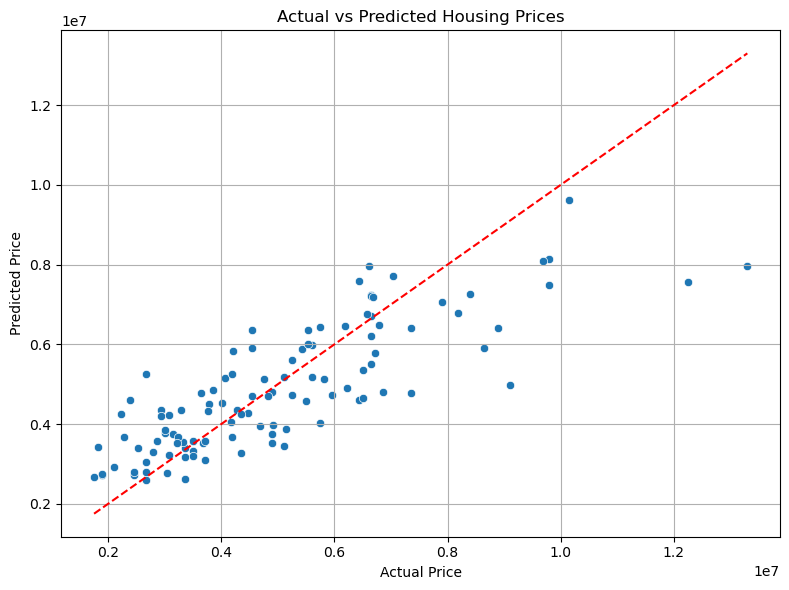


Regression Coefficients:
area                               2.359688e+02
bedrooms                           7.677870e+04
bathrooms                          1.094445e+06
stories                            4.074766e+05
parking                            2.248419e+05
mainroad_yes                       3.679199e+05
guestroom_yes                      2.316100e+05
basement_yes                       3.902512e+05
hotwaterheating_yes                6.846499e+05
airconditioning_yes                7.914267e+05
prefarea_yes                       6.298906e+05
furnishingstatus_semi-furnished   -1.268818e+05
furnishingstatus_unfurnished      -4.136451e+05
dtype: float64

Model Intercept: 260,032.36


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load and preprocess the dataset
df = pd.read_csv(r"C:\Users\kanik\Downloads\Housing.csv")  # Adjust path if needed

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R² Score: {r2:.3f}")

# Step 5: Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

# Coefficients interpretation
coefficients = pd.Series(lr_model.coef_, index=X.columns)
print("\nRegression Coefficients:")
print(coefficients)

# Intercept
print(f"\nModel Intercept: {lr_model.intercept_:,.2f}")
